In [29]:
import pandas as pd
import os
from gensim.models import word2vec, KeyedVectors
import pandas as pd
# Read data into papers
papers = pd.read_csv('T.csv')
#Print head
papers.head()

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [30]:
papers = papers.drop(columns=['UserName', 'ScreenName', 'TweetAt'], axis=1).sample(100)
papers.head()

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Location,OriginalTweet,Sentiment
2234,"Ottawa, Ontario, Canada",Ontario insists there's 'plenty of food' as sh...,Neutral
3629,Kentucky,How are all of yall gonna support socialism b...,Negative
1095,London,This is what selfish greedy people's homes loo...,Negative
1852,"Swansea, Wales",Pity the millennial-hating reactionary who arr...,Extremely Negative
3425,"Coleraine, Northern Ireland",This was the picture in a local Supermarket th...,Extremely Positive


In [31]:
import re
papers['OriginalTweet_processed'] = \
papers['OriginalTweet'].map(lambda x: re.sub('[,\.!?]', '', x))

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence \.
<>:3: DeprecationWarning: invalid escape sequence \.
<ipython-input-31-c0d7779621b0>:3: DeprecationWarning: invalid escape sequence \.
  papers['OriginalTweet'].map(lambda x: re.sub('[,\.!?]', '', x))


In [32]:
# Convert the titles to lowercase
papers['OriginalTweet_processed'] = \
papers['OriginalTweet_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['OriginalTweet_processed'].head()

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2234    ontario insists there's 'plenty of food' as sh...
3629    how are all of yall gonna support socialism b...
1095    this is what selfish greedy people's homes loo...
1852    pity the millennial-hating reactionary who arr...
3425    this was the picture in a local supermarket th...
Name: OriginalTweet_processed, dtype: object

In [33]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = papers.OriginalTweet_processed.values.tolist()
data_words = list(sent_to_words(data))


data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['ontario', 'insists', 'plenty', 'food', 'shoppers', 'rush', 'stock', 'due', 'covid', 'https', 'tco', 'bdzvoii', 'bl']


[nltk_data] Downloading package stopwords to /home/purvj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words
print(type(texts))

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

<class 'list'>
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/purvj/anaconda3/lib/python3.8/asyncio/events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


In [35]:
nltk.download('punkt')

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /home/purvj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
from gensim.models import Word2Vec
model=Word2Vec(texts,min_count=1,size=50,workers=3, window =3,sg=0)
model.most_similar('covid')

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-36-77ceaeed27b2>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('covid')


[('gisvratyjk', 0.45491528511047363),
 ('disrupt', 0.4472627639770508),
 ('keep', 0.4106982350349426),
 ('rationing', 0.3966212570667267),
 ('staying', 0.3760533630847931),
 ('finna', 0.3743641674518585),
 ('cat', 0.3725285530090332),
 ('pghd', 0.36188778281211853),
 ('handling', 0.34864434599876404),
 ('seen', 0.34616097807884216)]

In [37]:
vec=model.wv['corona']-model.wv['shopping']+model.wv['virus']
model.most_similar([vec])

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-37-14a37240a9fd>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar([vec])


[('corona', 0.6068282127380371),
 ('virus', 0.595441460609436),
 ('fed', 0.35831359028816223),
 ('watches', 0.35508081316947937),
 ('city', 0.33826321363449097),
 ('ninja', 0.3243476152420044),
 ('bar', 0.32311052083969116),
 ('low', 0.3162698745727539),
 ('selling', 0.31441056728363037),
 ('threat', 0.31330475211143494)]

In [38]:

print([vec])
model.wv['covid']

[array([-1.1663913e-02, -9.0715550e-03, -9.6131945e-03, -7.1915817e-03,
       -6.2803025e-03, -1.0674046e-02, -4.9814149e-03,  7.5213616e-03,
       -2.3406520e-03, -1.3629776e-02,  5.0984076e-03,  3.7685609e-03,
        1.5984256e-02,  2.3771271e-03, -1.1001314e-02,  2.1037523e-04,
       -7.8746621e-03, -6.3789077e-03, -1.7414454e-02, -6.4970832e-03,
        3.4802936e-03,  8.9422408e-03,  4.9311144e-04,  1.3496919e-02,
       -3.1252904e-03,  7.6588201e-03, -1.2571573e-02,  5.4215188e-03,
       -2.0016005e-02,  1.2007002e-02,  4.0810695e-03,  3.2985017e-03,
        2.7015517e-03,  1.8299878e-02, -8.0084726e-03, -4.7391653e-04,
        1.9843614e-02, -9.8655000e-04,  2.8140598e-03,  2.1904241e-04,
        6.9918646e-03, -2.7986633e-02,  5.4724701e-04,  1.5062451e-02,
       -1.0774259e-02, -4.9350027e-05,  1.3304004e-02,  1.3464177e-02,
       -5.5522332e-03, -1.1328906e-02], dtype=float32)]


/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([-0.00927233,  0.0084155 , -0.00818236,  0.0011578 , -0.00657818,
       -0.00878608,  0.006558  ,  0.00481726,  0.00874057,  0.00784731,
        0.00266156,  0.00197322, -0.00704013,  0.00906666,  0.00998109,
        0.0014121 ,  0.00368378, -0.00750736, -0.01059606, -0.00228118,
        0.0075792 , -0.00419088,  0.00813657, -0.00156329, -0.00344289,
       -0.00578597, -0.00052362,  0.00727422,  0.00386269, -0.00336741,
        0.00627972, -0.00063107, -0.00326515, -0.00522708, -0.0017546 ,
        0.00286953, -0.0087832 ,  0.00760566,  0.00653058,  0.00042889,
        0.00364162,  0.00380585,  0.00536535, -0.0090669 ,  0.00552799,
       -0.00127771,  0.00800097, -0.00205763, -0.00492059,  0.00250936],
      dtype=float32)

In [39]:
dictionary = corpora.Dictionary(texts)
#print(dictionary.token2id)
#print (len(dictionary))
#for j in  dictionary:
    #print (dictionary[j])
#print (dictionary)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(texts) for texts in texts]
print ('\n')
#print (corpus)
print ('\n')
# generate LDA model
from pprint import pprint
num_topics=5
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)
#print(ldamodel.print_topics())
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/purvj/anaconda3/lib/python3.8/asyncio/events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


[(0,
  '0.032*"tco" + 0.031*"https" + 0.026*"coronavirus" + 0.018*"covid" + '
  '0.016*"food" + 0.015*"covid_" + 0.015*"stock" + 0.012*"store" + '
  '0.012*"grocery" + 0.009*"amp"'),
 (1,
  '0.025*"coronavirus" + 0.023*"https" + 0.022*"tco" + 0.011*"covid" + '
  '0.011*"covid_" + 0.008*"grocery" + 0.008*"store" + 0.007*"stores" + '
  '0.006*"important" + 0.005*"let"'),
 (2,
  '0.020*"covid_" + 0.019*"coronavirus" + 0.016*"covid" + 0.011*"online" + '
  '0.011*"food" + 0.010*"https" + 0.010*"stock" + 0.009*"tco" + 0.009*"toilet" '
  '+ 0.008*"shopping"'),
 (3,
  '0.027*"food" + 0.019*"coronavirus" + 0.015*"stock" + 0.014*"covid" + '
  '0.012*"people" + 0.011*"amp" + 0.008*"tco" + 0.008*"https" + 0.007*"panic" '
  '+ 0.007*"store"'),
 (4,
  '0.019*"covid_" + 0.017*"store" + 0.016*"covid" + 0.013*"grocery" + '
  '0.011*"like" + 0.010*"supermarket" + 0.008*"https" + 0.008*"tco" + '
  '0.008*"need" + 0.006*"right"')]


In [40]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.3205019088070606


In [42]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


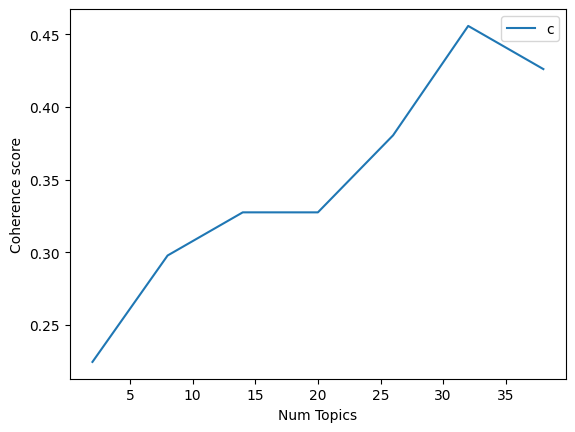

Coherence


In [43]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
print("Coherence")

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


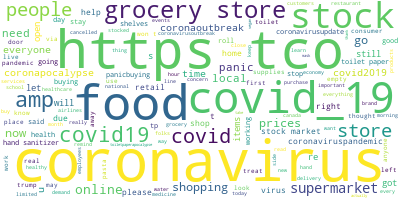

In [44]:
from wordcloud import WordCloud
long_string = ','.join(list(papers['OriginalTweet_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [45]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('result/ldavis_prepared_10'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'result/ldavis_prepared_10'+ str(num_topics) +'.html')
LDAvis_prepared

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.040295  0.072402       1        1  27.205835
2      0.045756 -0.024832       2        1  21.048273
3     -0.068445 -0.067122       3        1  19.763755
4      0.065794 -0.007079       4        1  17.633049
1     -0.002810  0.026631       5        1  14.349088, topic_info=           Term       Freq      Total Category  logprob  loglift
5         https  33.000000  33.000000  Default  30.0000  30.0000
12          tco  33.000000  33.000000  Default  29.0000  29.0000
4          food  26.000000  26.000000  Default  28.0000  28.0000
14  coronavirus  38.000000  38.000000  Default  27.0000  27.0000
29       covid_  27.000000  27.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
36  panicbuying   0.929495   3.914121   Topic5  -5.7255   0.5038
60        local   1.034616   7.150407   Topic5  -5.6184   0.0083
4          food   1.296306  26.776151   Topic5  -5.3929  -1.0865
76          get   1.031238   7.221969   Topic5  -5.6216  -0.0049
11        stock   1.127844  20.386863   Topic5  -5.5321  -0.9531

[339 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
393       4  0.754223          access
877       2  0.379225        actually
877       3  0.379225        actually
449       1  0.754018  ahpassociation
170       4  0.754229            aldi
...     ...       ...             ...
403       5  0.254694         working
448       5  0.785200         worried
857       3  0.778717             yet
736       5  0.785869              yq
823       4  0.754245          zombie

[434 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 5, 2])